In [58]:
import pandas as pd
import sklearn.svm

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

STONKS ONLY GO UP

1. APPL
2. MSFT
3. TXN
4. SONY
5. GOOG
6. TSLA
7. KO
8. CMG
9. NVDA
10. AMD

Maybe??
1. FB
2. INTC

Stable

1. VOO
2. NASDAQ 100


In [59]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:

  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU

  try:

    tf.config.set_logical_device_configuration(

        gpus[0],

        [tf.config.LogicalDeviceConfiguration(memory_limit=2048)])

    logical_gpus = tf.config.list_logical_devices('GPU')

    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

  except RuntimeError as e:

    # Virtual devices must be set before GPUs have been initialized

    print(e)

In [60]:
#load data
import pandas as pd
import numpy as np

df = pd.read_csv('MSFT.csv')
dataset = df.values
print(df.Date)

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9091    2022-04-06
9092    2022-04-07
9093    2022-04-08
9094    2022-04-11
9095    2022-04-12
Name: Date, Length: 9096, dtype: object


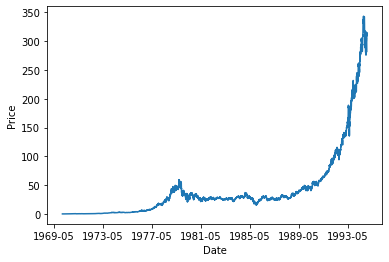

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

fmt_half_year = mdates.MonthLocator(interval=48)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [62]:
dataset = df.drop(['Date'], axis=1)
feature_columns = ['Open']
train_X = df.loc[:,feature_columns]
train_y = df.Close

dataset = dataset.astype('float64')
def create_dataset(n_X, look_back):
    data_X, data_y = [],[]
    for i in range(len(n_X) - look_back):
        a = n_X[i:(i+look_back),]
        data_X.append(a)
        data_y.append(n_X[i + look_back, ])

train_X = train_X.values
print(len(train_X))
reshaped_train_x = train_X.reshape(1, 9096, 1)
train_y = train_y.values
print(train_X.flatten())


9096
[8.85420000e-02 9.72220000e-02 1.00694000e-01 ... 3.00440002e+02
 2.91790009e+02 2.89239990e+02]


In [2]:
from sklearn.svm import SVR


model = SVR()

In [29]:
'''
  Drops the date column from the dataframe
'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MSFT.csv')

df['Date']= pd.to_datetime(df['Date'])
split_date = pd.datetime(2015, 1, 1)
training_dataframe = df.loc[df['Date'] <= split_date]
testing_dataframe = df.loc[df['Date'] > split_date]

split_date = pd.datetime(2000, 1, 1)
training_dataframe = df.loc[df['Date'] >= split_date]

training_dataframe = training_dataframe[['Open', 'Close', 'Volume']]
testing_dataframe = testing_dataframe[['Open', 'Close', 'Volume']]
print(training_dataframe.head())
print(testing_dataframe.head())

          Open     Close    Volume
3490  58.68750  58.28125  53228400
3491  56.78125  56.31250  54119000
3492  55.56250  56.90625  64059600
3493  56.09375  55.00000  54976600
3494  54.31250  55.71875  62013600
           Open      Close    Volume
7263  46.660000  46.759998  27913900
7264  46.369999  46.330002  39673900
7265  46.380001  45.650002  36447900
7266  45.980000  46.230000  29114100
7267  46.750000  47.590000  29645200


/tmp/ipykernel_356448/176491310.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2015, 1, 1)
/tmp/ipykernel_356448/176491310.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2000, 1, 1)


In [34]:
print(training_dataframe.values)
train_X = training_dataframe[['Open']].values
train_y = training_dataframe[['Close']].values
test_X = testing_dataframe[['Open']].values
test_y = testing_dataframe[['Close']].values
model.fit(train_X, train_y)

[[5.86875000e+01 5.82812500e+01 5.32284000e+07]
 [5.67812500e+01 5.63125000e+01 5.41190000e+07]
 [5.55625000e+01 5.69062500e+01 6.40596000e+07]
 ...
 [3.00440002e+02 2.96970001e+02 2.43474000e+07]
 [2.91790009e+02 2.85260010e+02 3.45693000e+07]
 [2.89239990e+02 2.82059998e+02 3.09667000e+07]]


/home/wthunder/anaconda3/envs/tf_gpu2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

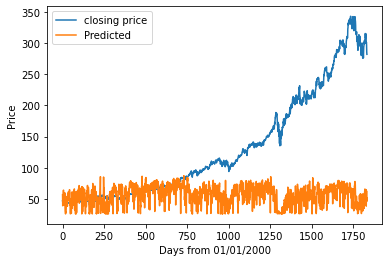

In [32]:
prediction = model.predict(test_X)
plt.plot(testing_dataframe[['Close']].values.flatten(), label="closing price")
plt.plot(prediction, label="Predicted")
plt.ylabel("Price")
plt.xlabel("Days from 01/01/2000")
plt.legend()

In [27]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(test_y.flatten(), prediction)
print("This is the mse for SVC:" + str(score))

This is the mse for SVC:86.94086180684063
